Матрица M = <g_i, g_j>:
[[1.         0.5       ]
 [0.5        0.33333334]]
Вектор b = <g_i, f>:
[1.71828183 1.        ]
Коэффициенты (a, b):
a = 0.87312731,  b = 1.69030903
Среднеквадратичная ошибка = 6.27711983e-02


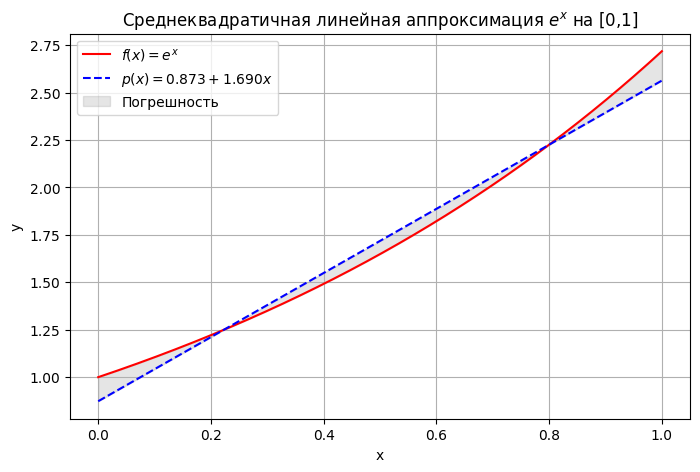

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Скалярное произведение функций
def dot_product(f, g, x):
    return np.trapezoid(f * g, x)

# Получение матрицы системы линейных уравнений (матрица скалярных произведений) и вектора правой части
def build_system(basis, f, x):
    n = len(basis)
    M = np.zeros((n, n))
    b = np.zeros(n)

    for i in range(n):
        g_i = basis[i](x)
        b[i] = dot_product(g_i, f, x)
        for j in range(n):
            g_j = basis[j](x)
            M[i, j] = dot_product(g_i, g_j, x)
    return M, b

# Исходная функция
f = lambda x: np.exp(x) # f(x) = e^x

# Функции по которым производится аппроксимация
basis = [
    lambda x: np.ones_like(x),  # g_1(x) = 1
    lambda x: x                 # g_2(x) = x
]

x = np.linspace(0, 1, 10000) # Отрезок [0, 1]

# Построение системы и решение
M, b = build_system(basis, f(x), x)
alpha = np.linalg.solve(M, b)
a, b_coef = alpha

print("Матрица M = <g_i, g_j>:")
print(M)
print("Вектор b = <g_i, f>:")
print(b)
print("Коэффициенты (a, b):")
print(f"a = {a:.8f},  b = {b_coef:.8f}")

# Построение приближения
p = a + b_coef * x

# Среднеквадратичная ошибка как интеграл квадрат разности функций
error = np.sqrt(np.trapezoid((f(x) - p)**2, x)) 

print(f"Среднеквадратичная ошибка = {error:.8e}")

# Графики

plt.figure(figsize=(8,5))
plt.plot(x, f(x), 'r', label=r'$f(x)=e^x$')
plt.plot(x, p, 'b--', label=fr'$p(x)={a:.3f}+{b_coef:.3f}x$')
plt.fill_between(x, f(x), p, color='gray', alpha=0.2, label='Погрешность')
plt.title('Cреднеквадратичная линейная аппроксимация $e^x$ на [0,1]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
